In [2]:
%reload_ext autoreload

import reservoirpy as rpy
rpy.verbosity(0)
rpy.set_seed(42)

from custom_reservoir import CustomReservoir
from neuron_models.hh_neuron import HHNeuron
import numpy as np

# シミュレーションの設定
units = 10 # ニューロン数
T = 450.0  # ms
dt = 0.05  # ms
nt = int(T / dt)  # 時間ステップ数
N = 1  # ニューロンの数

# LIFニューロンモデルを作成
lif_model = HHNeuron(units=units, dt=dt, method="RK45")

# カスタムリザバーを作成
reservoir = CustomReservoir(
    units=units,  # ニューロン数
    neuron_model=lif_model,  # LIFニューロンモデル
    rc_connectivity = 0.1,
    input_connectivity = 0.1,  
    fb_connectivity = 0 # fb接続なし 
)

# 入力電流
t = np.arange(1, nt + 1) * dt
X = 10.0 * ((t > 50) & (t <= 200)) + 35.0 * ((t > 250) & (t <= 400))

# スパイクと膜電位の記録
spike = np.empty((len(X), reservoir.units))
V = np.empty((len(X), reservoir.units))
m = np.empty((len(X), reservoir.units))
h = np.empty((len(X), reservoir.units))
n = np.empty((len(X), reservoir.units))
for i in range(len(X)):
    spike[i] = reservoir(X[i].reshape(1, -1))
    V[i] = reservoir.neuron_model.V.flatten()
    m[i] = reservoir.neuron_model.m.flatten()
    h[i] = reservoir.neuron_model.h.flatten()
    n[i] = reservoir.neuron_model.n.flatten()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

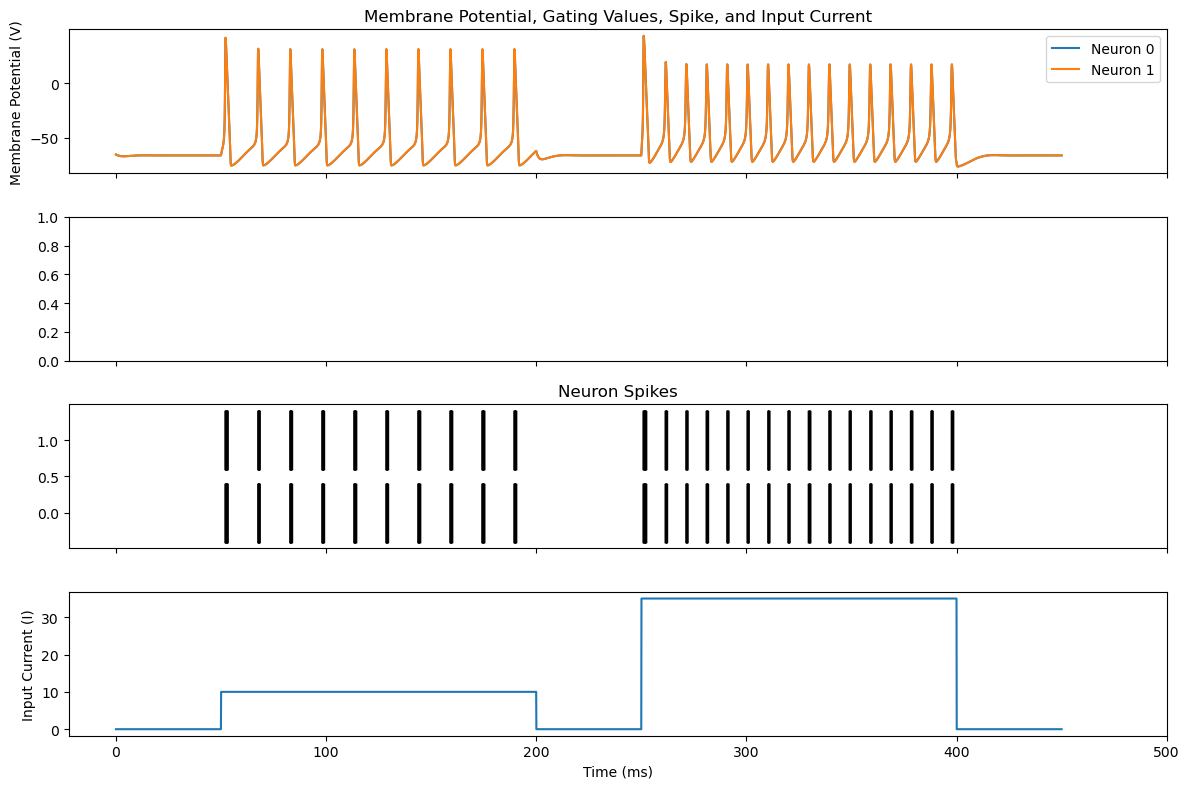

In [3]:
import matplotlib.pyplot as plt

# グラフのプロット
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# 横軸の設定
time = t  # 時間軸
xticks = np.arange(0, T + 100, 100)  # 100 msごとに印をつける

# 1. 膜電位のプロット
for neuron_idx in range(V.shape[1]):
    axs[0].plot(time, V[:, neuron_idx], label=f"Neuron {neuron_idx}")
axs[0].set_ylabel("Membrane Potential (V)")
axs[0].set_title("Membrane Potential, Gating Values, Spike, and Input Current")


# # 2. Gating Valuesのプロット
# axs[1].plot(time, m, label="m")
# axs[1].plot(time, h, label="h")
# axs[1].plot(time, n, label="n")
# axs[1].set_ylabel("Gating Value")
# axs[1].legend()

# 3. スパイクのプロット
axs[2].set_title("Neuron Spikes")
for neuron_idx in range(spike.shape[1]):
    for t_idx, spike_value in enumerate(spike[:, neuron_idx]):
        if spike_value > 0:
            axs[2].plot([t_idx * dt, t_idx * dt], [neuron_idx - 0.4, neuron_idx + 0.4], color='k', linestyle='-', linewidth=1)


# 4. 入力電流のプロット
axs[3].plot(time, X)
axs[3].set_ylabel("Input Current (I)")
axs[3].set_xlabel("Time (ms)")

# 横軸の設定
for ax in axs:
    ax.set_xticks(xticks)

plt.tight_layout()
plt.show()
